In [1]:
import gdown
import shutil
from astrohack.panel import panel
from astrohack._utils._fits_io import _aips_holog_to_xds
import os

In [2]:
# Download VLA Holography with known panel deviationsurl = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
datafolder = "./paneldata/"
os.makedirs(name=datafolder, exist_ok=True)
panelzip = datafolder+"panel.zip"
if not os.path.exists(panelzip):
    url = "https://drive.google.com/u/1/uc?id=10fXyut_UHPUjIuaaEy6-m6wcycZHit2v&export=download"
    gdown.download(url, panelzip)
shutil.unpack_archive(filename=panelzip, extract_dir=datafolder)

In [3]:
# Create input data set
holog_image = datafolder+'input.zarr'
input_data_xds = _aips_holog_to_xds(datafolder+'amp.fits', datafolder+'dev.fits')
input_data_xds.to_zarr(holog_image, mode='w')

CPU times: user 33.5 s, sys: 2.13 s, total: 35.7 s
Wall time: 33.1 s


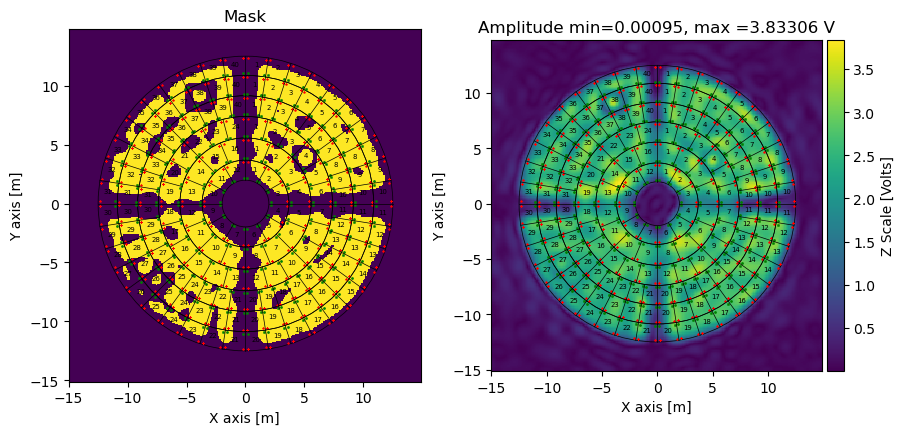

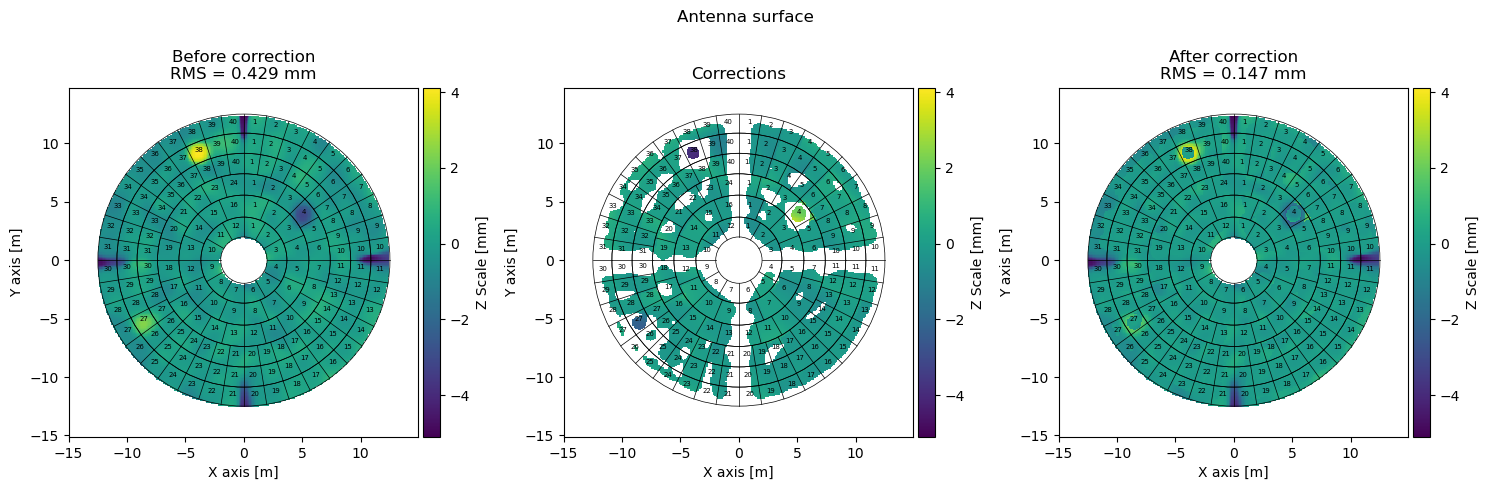

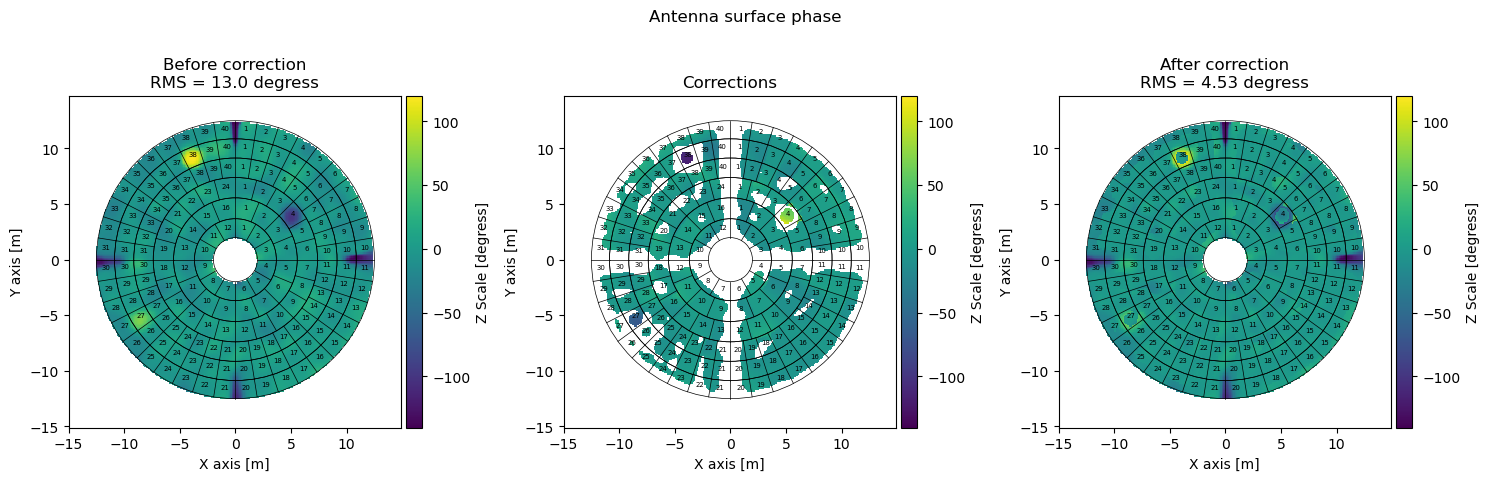

In [13]:
%%time
# Execute Panel chunk
panel(holog_image, 
      aipsdata=True, 
      telescope='vla', 
      basename='antenna25', 
      save_mask=True, 
      save_phase=True, 
      unit='miliinches', cutoff=0.6)

In [5]:
# Display report
!cat antenna25/report.txt

Gains before correction: Real: 1.02e+02 dB, Theoretical: 1.03e+02 dB
RMS before correction:   0.481 mm

Gains after correction: Real: 1.03e+02 dB, Theoretical: 1.03e+02 dB
RMS after correction:   0.198 mm
